# Data Preparation
Preparing Digit Recognizer data imported from Kaggle

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow import keras

IMG_ROWS, IMG_COLS = 28, 28
num_classes = 10

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
train_y = train_data['label']
train_X = train_data.drop(labels=['label'], axis=1)

In [4]:
print(train_X.shape, train_y.shape)

(42000, 784) (42000,)


In [5]:
train_X = train_X / 255.0
test_data = test_data / 255.0

train_X = train_X.values.reshape(-1, IMG_ROWS, IMG_COLS, 1)
test_data = test_data.values.reshape(-1, IMG_ROWS, IMG_COLS, 1)

train_y = to_categorical(train_y, num_classes=10)

In [6]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.1)

# Create Model

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [8]:
model = Sequential()

# First layer
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(Conv2D(32, kernel_size=2, activation='relu', strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=2, activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=2, activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=2, activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Summary of model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         6

# Fit Model

In [11]:
model.fit(train_X, train_y, batch_size=256, epochs=8, validation_data=(val_X, val_y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/8
37800/37800 [==============================] - 4s 96us/sample - loss: 0.4944 - acc: 0.8363 - val_loss: 0.0982 - val_acc: 0.9710
Epoch 2/8
37800/37800 [==============================] - 2s 51us/sample - loss: 0.1088 - acc: 0.9695 - val_loss: 0.0689 - val_acc: 0.9802
Epoch 3/8
37800/37800 [==============================] - 2s 50us/sample - loss: 0.0769 - acc: 0.9779 - val_loss: 0.0539 - val_acc: 0.9833
Epoch 4/8
37800/37800 [==============================] - 2s 51us/sample - loss: 0.0560 - acc: 0.9849 - val_loss: 0.0615 - val_acc: 0.9843
Epoch 5/8
37800/37800 [==============================] - 2s 51us/sample - loss: 0.0490 - acc: 0.9862 - val_loss: 0.0514 - val_acc: 0.9862
Epoch 6/8
37800/37800 [==============================] - 2s 51us/sample - loss: 0.0384 - acc: 0.9883 - val_loss: 0.0612 - val_acc: 0.9843
Epoch 7/8
37800/37800 [==============================] - 2s 51us/sample - loss: 0.0320 - acc: 0.9906 - val_loss: 0.0472 - v

# Testing on individual digits

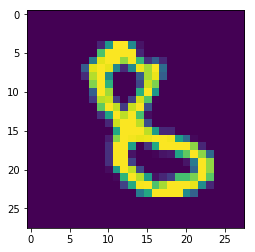

In [12]:
import matplotlib.pyplot as plt

test_digit = val_X[0][:,:,0]
plt.imshow(test_digit)

In [13]:
test_digit = test_digit.reshape(-1, IMG_ROWS, IMG_COLS, 1)

pred = model.predict_classes(test_digit, batch_size=1)
print(pred)

[8]


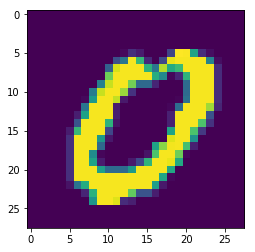

In [16]:
test_digit2 = val_X[1][:,:,0]
plt.imshow(test_digit2)

In [15]:
test_digit2 = test_digit2.reshape(-1, IMG_ROWS, IMG_COLS, 1)

pred2 = model.predict_classes(test_digit2, batch_size=1)
print(pred2)

[0]
